In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
dfship = pd.read_csv(r"C:\Users\hp\Desktop\Dataset_2 set\Outlier Detection\titanic.csv")

In [4]:
dfship

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
dfship.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Gender',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [7]:
dfship.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
dfship.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin',], axis = 1, inplace=True)

In [10]:
dfship

,Survived,Pclass,Gender,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [11]:
dfship["Gender"].unique()

array(['male', 'female'], dtype=object)

In [12]:
dfship["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
dfship["Embarked"].dropna(inplace=True)

In [20]:
dfship.isna().sum()

Survived      0
Pclass        0
Gender        0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [23]:
dfship.dropna(subset="Embarked", inplace=True)

In [24]:
dfship

,Survived,Pclass,Gender,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
ohe = OneHotEncoder()

In [27]:
ohe.fit(dfship[["Gender"]])

OneHotEncoder()

In [28]:
ohe.transform(dfship[["Gender"]])

<889x2 sparse matrix of type '<class 'numpy.float64'>'
	with 889 stored elements in Compressed Sparse Row format>

In [32]:
ary1 = ohe.transform(dfship[["Gender"]]).toarray()

In [30]:
ohe.categories_

[array(['female', 'male'], dtype=object)]

In [39]:
dfgen = pd.DataFrame(ary1, columns = ['female', 'male'], dtype="int")

In [40]:
dfgen

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
884,0,1
885,1,0
886,1,0
887,0,1


In [41]:
dfship

,Survived,Pclass,Gender,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [44]:
pd.concat([dfship, dfgen], axis = 1)

,Survived,Pclass,Gender,Age,SibSp,Parch,Embarked,female,male
0,0.0,3.0,male,22.0,1.0,0.0,S,0.0,1.0
1,1.0,1.0,female,38.0,1.0,0.0,C,1.0,0.0
2,1.0,3.0,female,26.0,0.0,0.0,S,1.0,0.0
3,1.0,1.0,female,35.0,1.0,0.0,S,1.0,0.0
4,0.0,3.0,male,35.0,0.0,0.0,S,0.0,1.0
...,...,...,...,...,...,...,...,...,...
888,0.0,3.0,female,NaN,1.0,2.0,S,0.0,1.0
889,1.0,1.0,male,26.0,0.0,0.0,C,NaN,NaN
890,0.0,3.0,male,32.0,0.0,0.0,Q,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0


In [45]:
dfship

,Survived,Pclass,Gender,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [47]:
dfship = pd.get_dummies(dfship)

In [48]:
dfship

,Survived,Pclass,Age,SibSp,Parch,Gender_female,Gender_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,0,1,0,0,1
887,1,1,19.0,0,0,1,0,0,0,1
888,0,3,NaN,1,2,1,0,0,0,1
889,1,1,26.0,0,0,0,1,1,0,0


In [49]:
import matplotlib.pyplot as plt

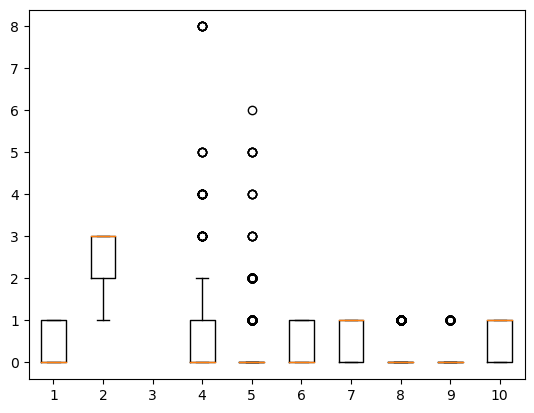

In [52]:
plt.boxplot(dfship)
plt.show()

In [53]:
dfship.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Gender_female',
       'Gender_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [54]:
dfship["SibSp"]

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 889, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x2a97cb204f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a97cb20df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a97cb1a130>],
 'medians': [<matplotlib.lines.Line2D at 0x2a97cb187f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a97cb18c70>],
 'means': []}

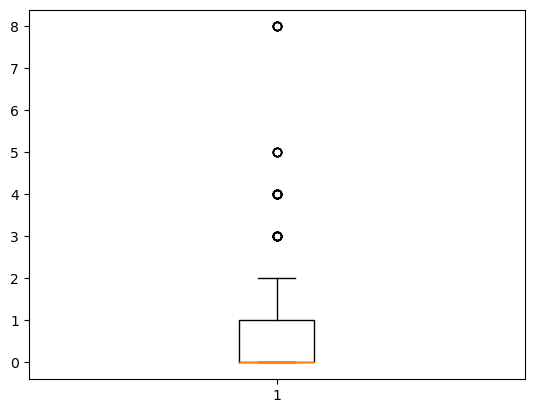

In [55]:
plt.boxplot(dfship["SibSp"])

### percentile

In [56]:
dfship["SibSp"]

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 889, dtype: int64

In [58]:
low = dfship["SibSp"].quantile(0.05)

In [59]:
dfship[ dfship["SibSp"] < low ]

,Survived,Pclass,Age,SibSp,Parch,Gender_female,Gender_male,Embarked_C,Embarked_Q,Embarked_S


In [60]:
up = dfship["SibSp"].quantile(0.95)

In [61]:
up

3.0

In [62]:
dfship[ dfship["SibSp"] > up]

,Survived,Pclass,Age,SibSp,Parch,Gender_female,Gender_male,Embarked_C,Embarked_Q,Embarked_S
16,0,3,2.0,4,1,0,1,0,1,0
50,0,3,7.0,4,1,0,1,0,0,1
59,0,3,11.0,5,2,0,1,0,0,1
68,1,3,17.0,4,2,1,0,0,0,1
71,0,3,16.0,5,2,1,0,0,0,1
119,0,3,2.0,4,2,1,0,0,0,1
159,0,3,NaN,8,2,0,1,0,0,1
164,0,3,1.0,4,1,0,1,0,0,1
171,0,3,4.0,4,1,0,1,0,1,0
180,0,3,NaN,8,2,1,0,0,0,1


In [63]:
dfship[ dfship["SibSp"] > up].shape[0]

30

###  Trim 

In [64]:
(dfship["SibSp"] < low) | (dfship["SibSp"] > up)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: SibSp, Length: 889, dtype: bool

In [65]:
dfship[ (dfship["SibSp"] < low) | (dfship["SibSp"] > up) ]

,Survived,Pclass,Age,SibSp,Parch,Gender_female,Gender_male,Embarked_C,Embarked_Q,Embarked_S
16,0,3,2.0,4,1,0,1,0,1,0
50,0,3,7.0,4,1,0,1,0,0,1
59,0,3,11.0,5,2,0,1,0,0,1
68,1,3,17.0,4,2,1,0,0,0,1
71,0,3,16.0,5,2,1,0,0,0,1
119,0,3,2.0,4,2,1,0,0,0,1
159,0,3,NaN,8,2,0,1,0,0,1
164,0,3,1.0,4,1,0,1,0,0,1
171,0,3,4.0,4,1,0,1,0,1,0
180,0,3,NaN,8,2,1,0,0,0,1


In [67]:
dfship = dfship[ (dfship["SibSp"] >= low) & (dfship["SibSp"] <= up) ]

In [68]:
dfship

,Survived,Pclass,Age,SibSp,Parch,Gender_female,Gender_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,0,1,0,0,1
887,1,1,19.0,0,0,1,0,0,0,1
888,0,3,NaN,1,2,1,0,0,0,1
889,1,1,26.0,0,0,0,1,1,0,0


In [ ]:
df